In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('/content/train_ctrUa4K.csv',index_col = 0)
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.shape

(614, 12)

In [ ]:
test.shape

(367, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [ ]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
list(train['Gender']).count('Female')

112

In [ ]:
list(test['Gender']).count('Female')

70

In [ ]:
#since majority are male to increase the test case for females we put null as females
train['Gender'] = train['Gender'].fillna('Female')
test['Gender'] = test['Gender'].fillna('Female')

In [ ]:
list(train['Married']).count('Yes')

398

In [ ]:
#we fill the married with No so that we can augment testcases
train['Married'] = train['Married'].fillna('No')

In [ ]:
#we will fill dependents with 0 so that we assume that the user has no dependents
train['Dependents'] = train['Dependents'].fillna('0')
test['Dependents'] = test['Dependents'].fillna('0')

In [ ]:
list(train['Self_Employed']).count('Yes')

82

In [ ]:
list(test['Self_Employed']).count('Yes')

37

In [ ]:
#yes is a minority we add yes as null
train['Self_Employed'] = train['Self_Employed'].fillna('Yes')
test['Self_Employed'] = test['Self_Employed'].fillna('Yes')

In [ ]:
#We fill loan ammount with mean as rest are float
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [ ]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

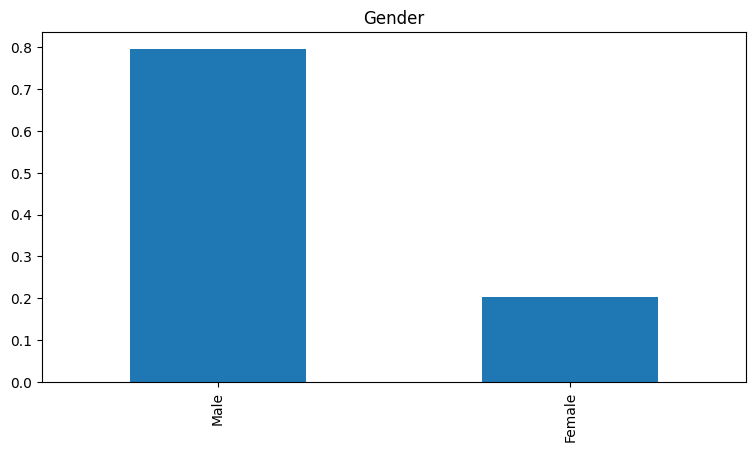

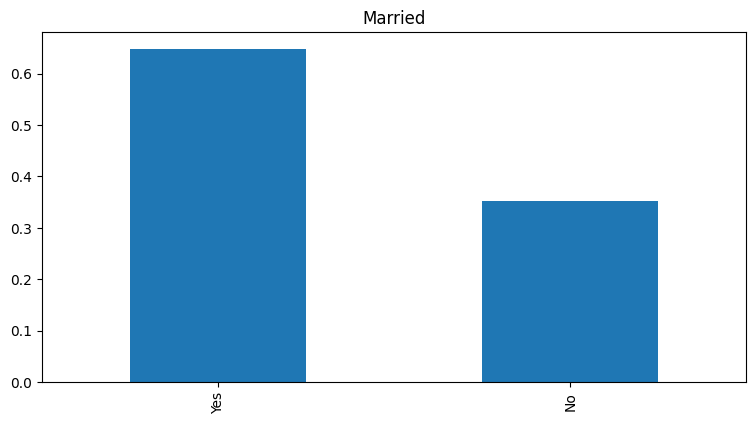

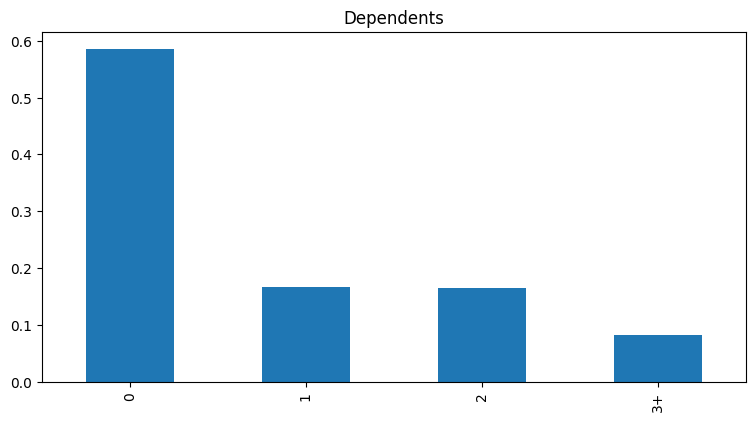

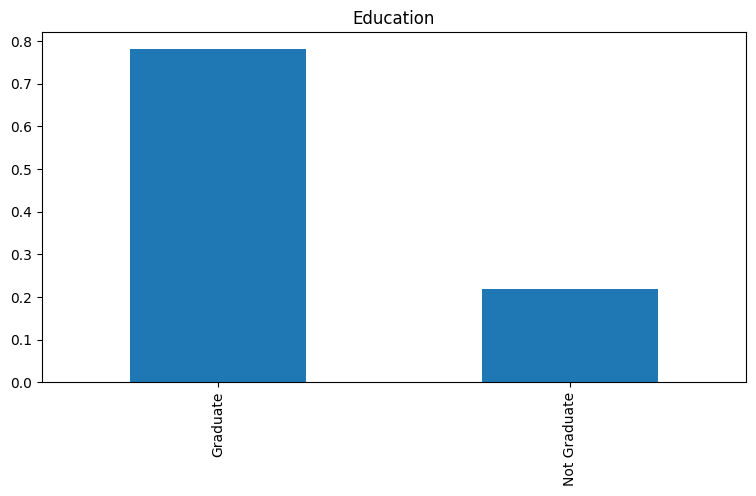

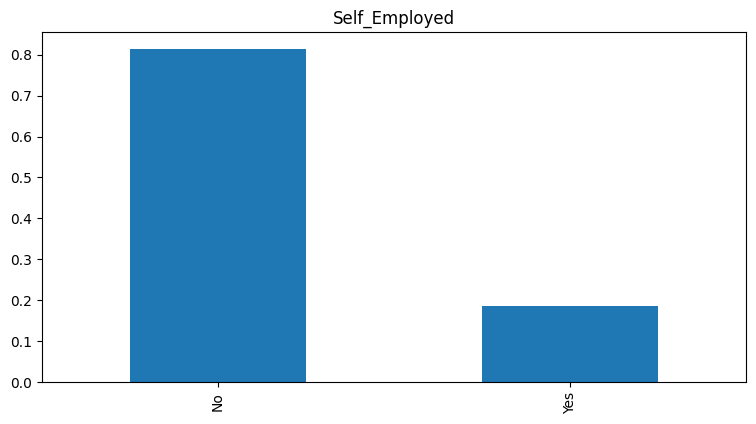

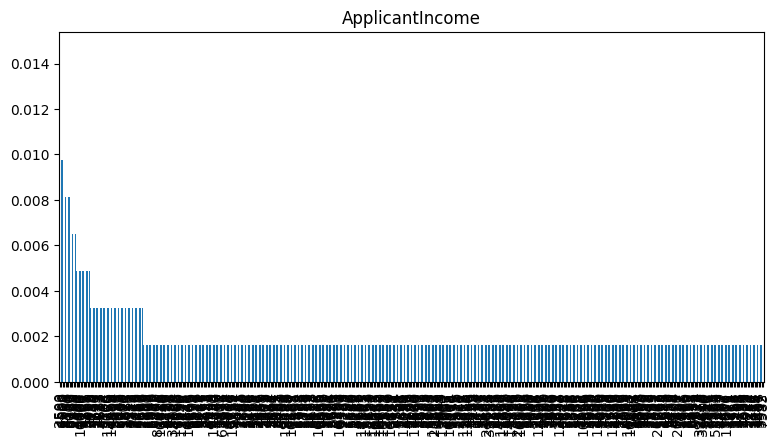

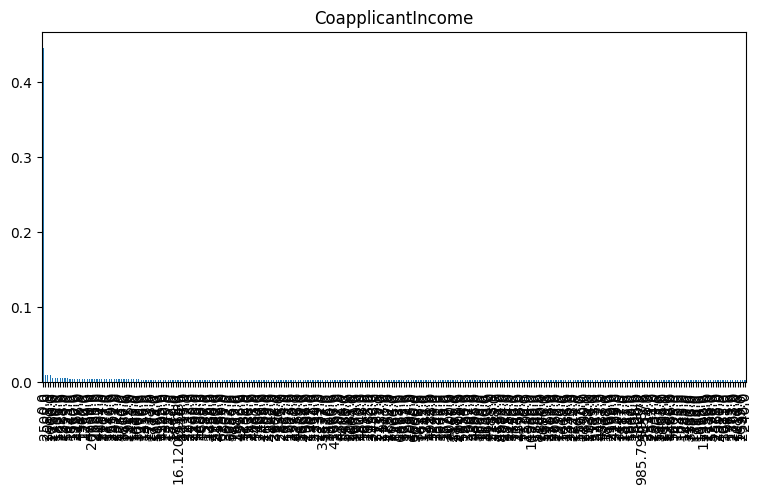

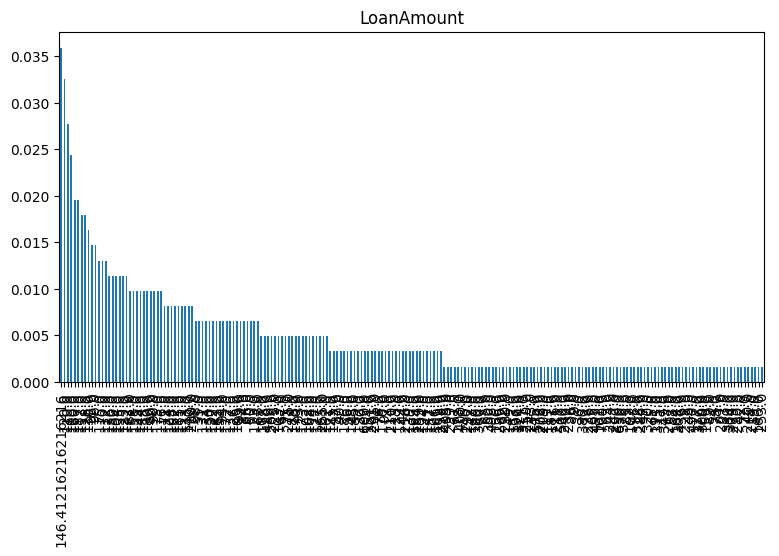

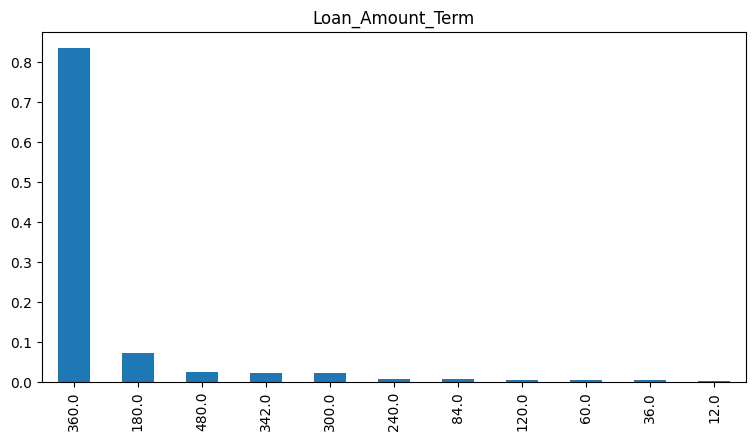

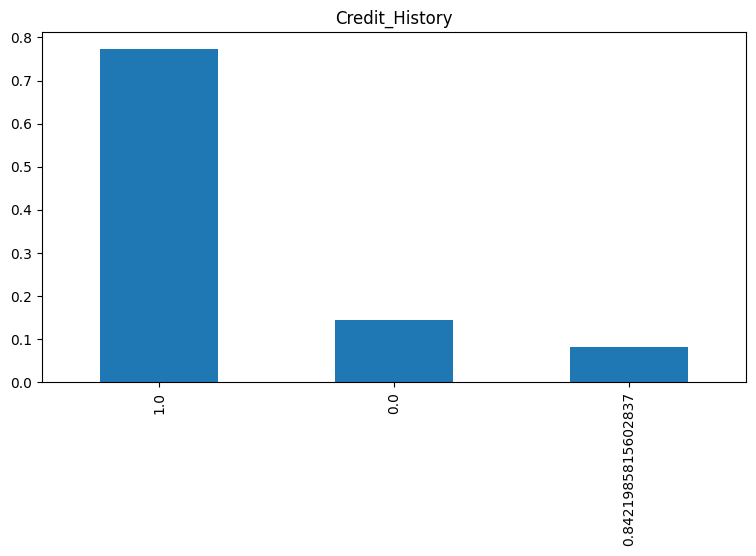

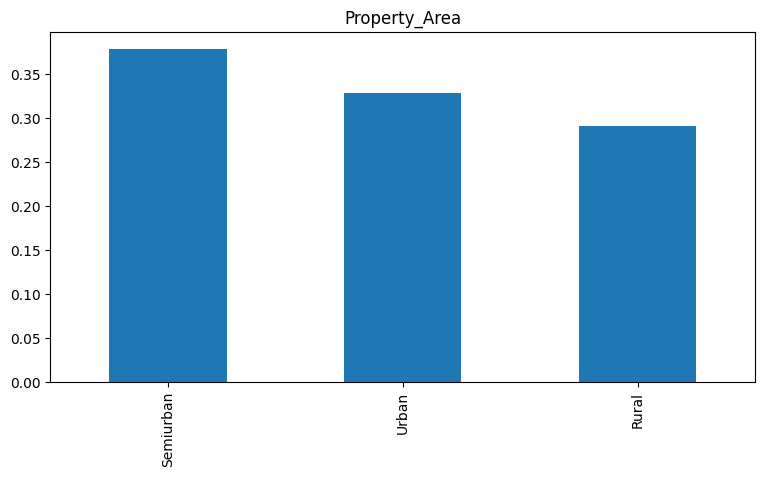

In [ ]:
for i in train.columns[:len(train.columns)-1]:
  plt.figure(1)
  plt.subplot(221)
  train[i].value_counts(normalize=True).plot.bar(figsize=(20,10), title= i)
  plt.show()
  print()

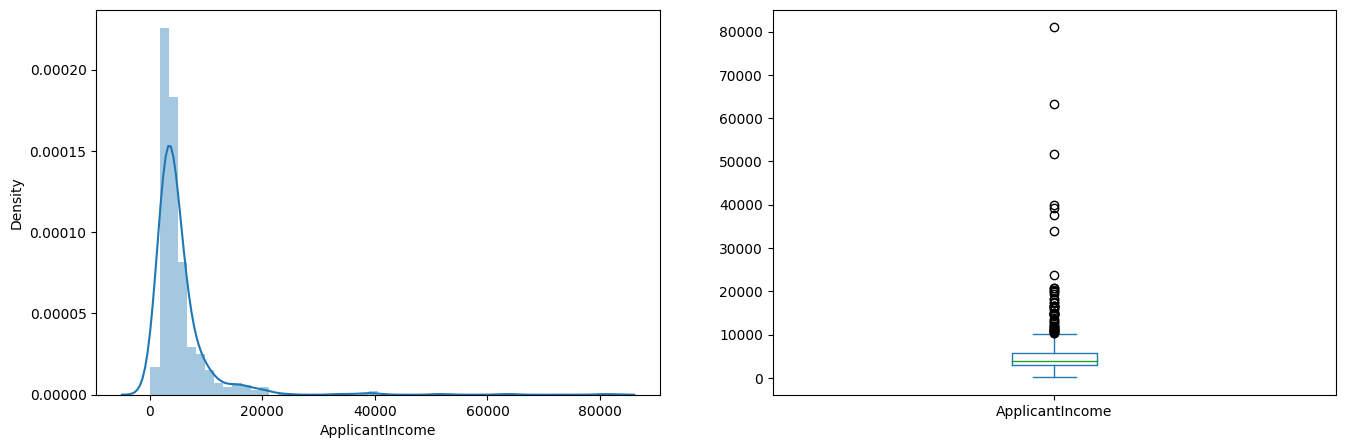

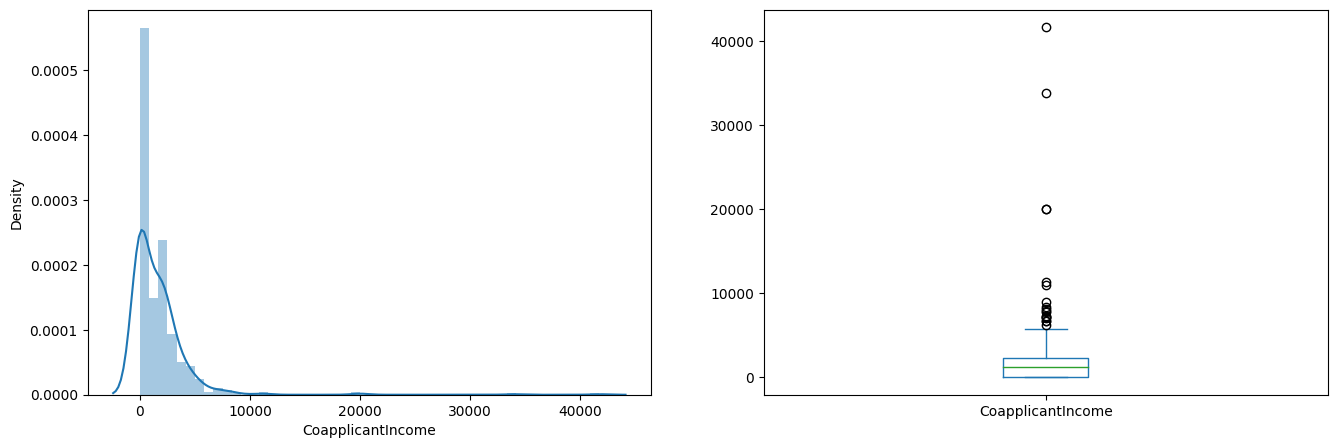

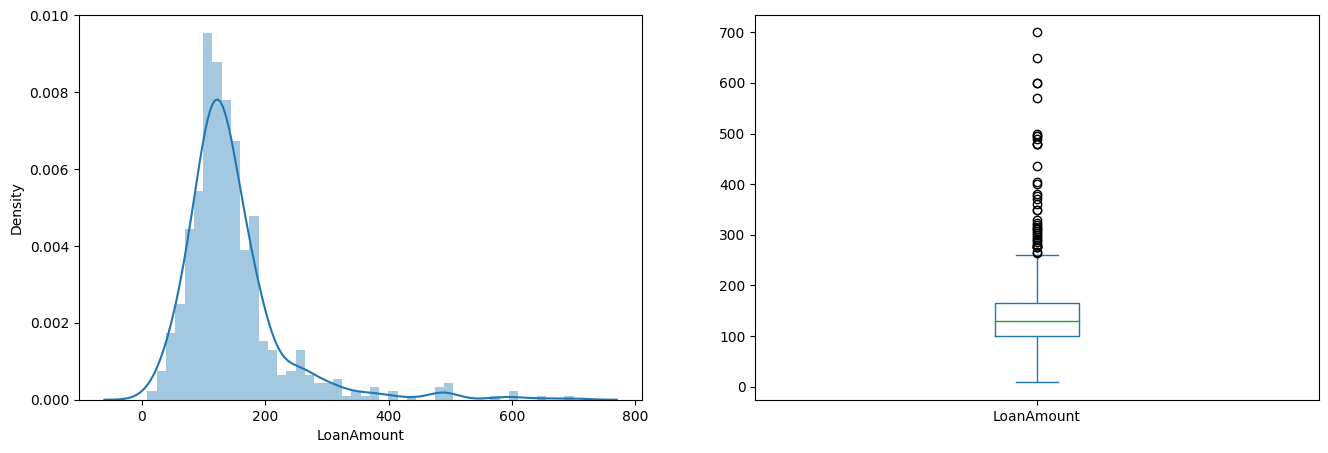

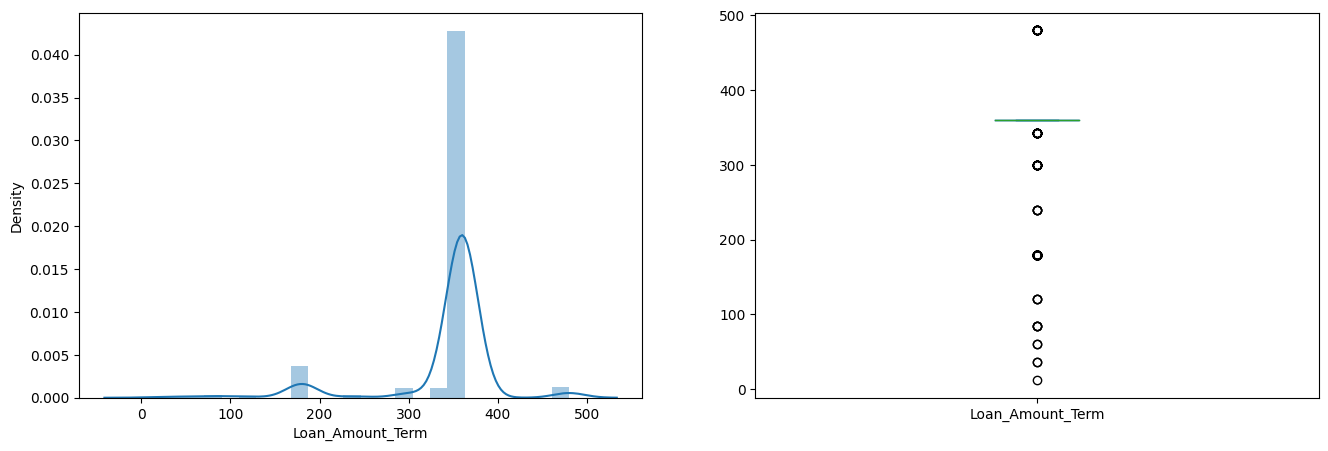

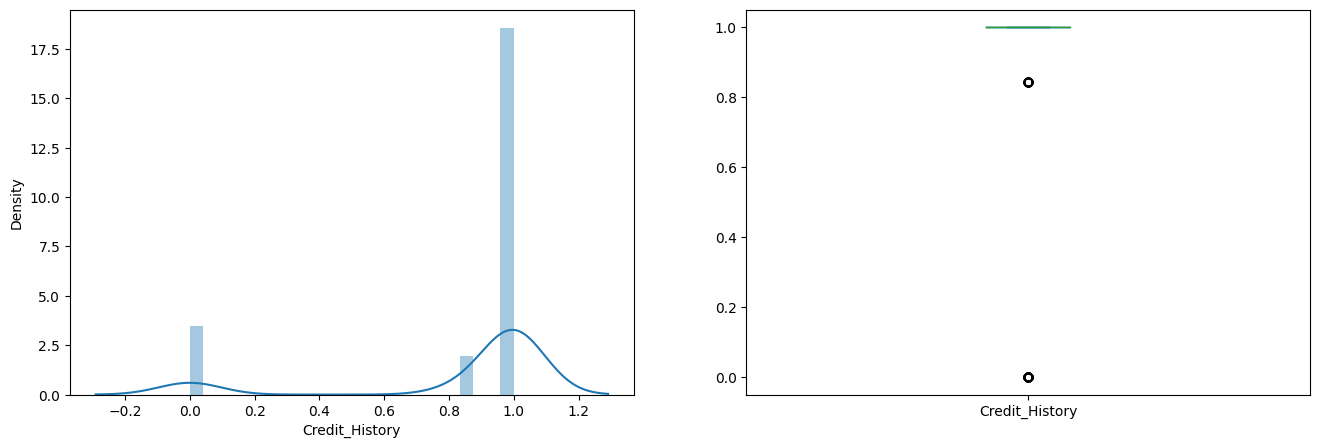

In [ ]:
for i in train.columns[:len(train.columns)-1]:
  if(train[i].dtypes in ['float64','int64']):
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(train[i]);
    plt.subplot(122)
    train[i].plot.box(figsize=(16,5))
    plt.show()
    print()

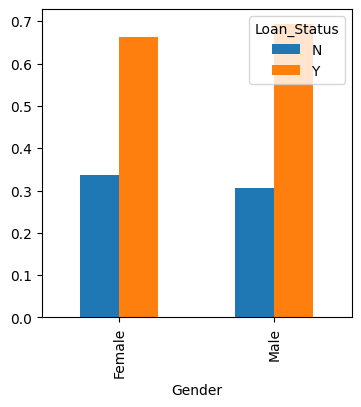

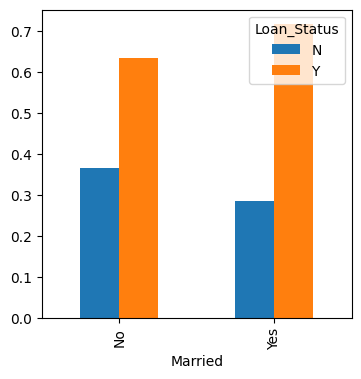

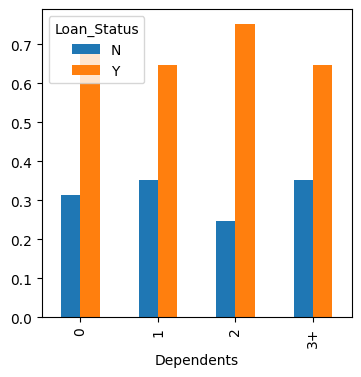

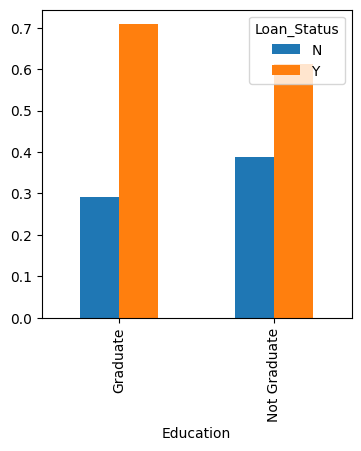

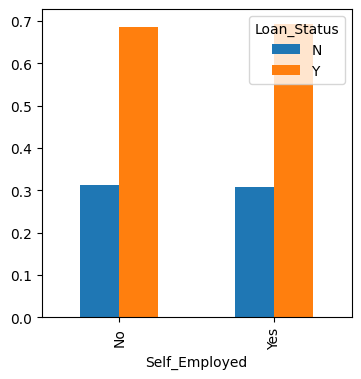

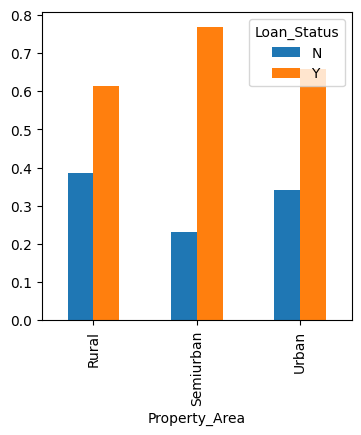

In [ ]:
for i in train.columns[:len(train.columns)-1]:
  if(train[i].dtypes not in ['float64','int64']):
    values=pd.crosstab(train[i],train['Loan_Status'])
    values.div(values.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
    print()

In [ ]:
mat = {'N':0,'Y':1}
data = [train]
for i in data:
  i['Loan_Status'] = i['Loan_Status'].map(mat)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in train.columns[:len(train.columns)]:
  if(train[i].dtypes not in ['float64','int64']):
    train[i]= label_encoder.fit_transform(train[i])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in test.columns[1:len(test.columns)]:
  if(test[i].dtypes not in ['float64','int64']):
    test[i]= label_encoder.fit_transform(test[i])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 62.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


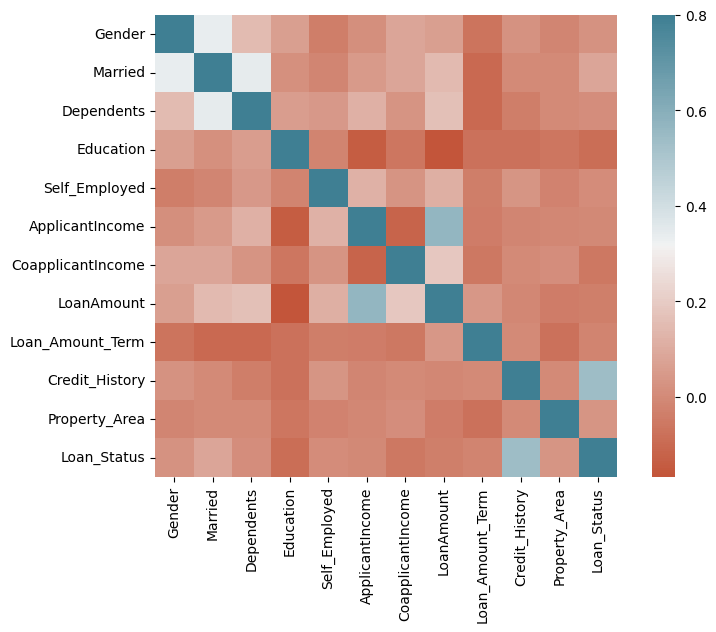

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap = sns.diverging_palette(20, 220, n=200));

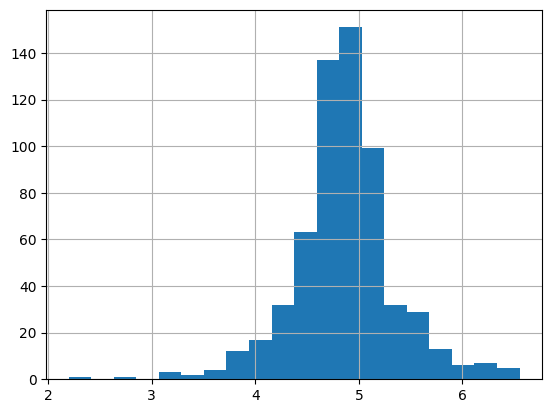

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [ ]:
from sklearn.linear_model import LogisticRegression
X, y = (train.drop('Loan_Status',axis=1),train['Loan_Status'])
clf = LogisticRegression(random_state=0).fit(X, y)
predicted_scores = clf.predict(test.drop('Loan_ID',axis = 1))

In [ ]:
predicted_scores

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test['Loan_ID']

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [ ]:
predicted_scores = list(predicted_scores)
for i in range (len(predicted_scores)):
  if predicted_scores[i] == 0:
    predicted_scores[i] = 'N'
  else:
    predicted_scores[i] = 'Y'
my_submission = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan_Status': predicted_scores})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [ ]:
sub = pd.read_csv('/content/submission.csv')

In [ ]:
sub.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [ ]:
sub.shape

(367, 2)